In [108]:
import pandas as pd
import matplotlib.pyplot as plt

In [110]:
wood_rankings = pd.read_csv('golden_ticket_award_winners_wood.csv')

In [112]:
print(wood_rankings.head())

   Rank          Name                       Park             Location  \
0     1  Boulder Dash             Lake Compounce       Bristol, Conn.   
1     2       El Toro  Six Flags Great Adventure        Jackson, N.J.   
2     3       Phoenix  Knoebels Amusement Resort        Elysburg, Pa.   
3     4    The Voyage              Holiday World    Santa Claus, Ind.   
4     5   Thunderhead                  Dollywood  Pigeon Forge, Tenn.   

           Supplier  Year Built  Points  Year of Rank  
0               CCI        2000    1333          2013  
1           Intamin        2006    1302          2013  
2  Dinn/PTC-Schmeck        1985    1088          2013  
3     Gravity Group        2006    1086          2013  
4              GCII        2004     923          2013  


In [114]:
steel_rankings = pd.read_csv('golden_ticket_award_winners_steel.csv')

In [116]:
print(steel_rankings.head())

   Rank                Name                        Park           Location  \
0     1    Millennium Force                 Cedar Point     Sandusky, Ohio   
1     2             Bizarro       Six Flags New England      Agawam, Mass.   
2     3  Expedition GeForce                Holiday Park  Hassloch, Germany   
3     4               Nitro   Six Flags Great Adventure      Jackson, N.J.   
4     5    Apollo's Chariot  Busch Gardens Williamsburg  Williamsburg, Va.   

  Supplier  Year Built  Points  Year of Rank  
0  Intamin        2000    1204          2013  
1  Intamin        2000    1011          2013  
2  Intamin        2001     598          2013  
3      B&M        2001     596          2013  
4      B&M        1999     542          2013  


In [118]:
def plot_coaster_ranking(name, park, rankings_df):
    coaster_rankings = rankings_df[(rankings_df['Name'] == name) & 
                        (rankings_df['Park'] == park)]
    plt.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'])
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'Ranking of {name} at {park} Over Time')
    plt.show()

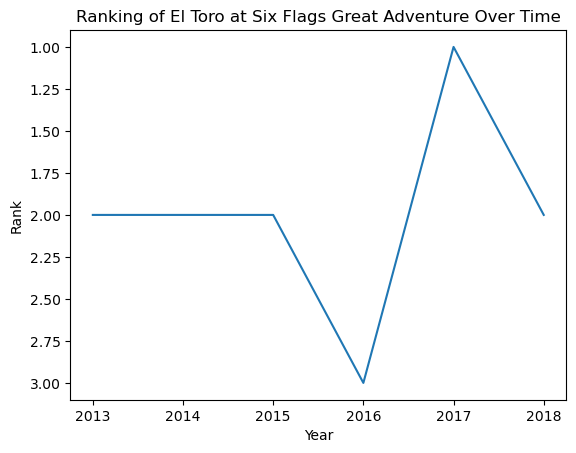

In [120]:
plot_coaster_ranking('El Toro', 'Six Flags Great Adventure', wood_rankings)

In [121]:
def plot_two_coasters_ranking(name1, park1, name2, park2, rankings_df):
    coaster_rankings1 = rankings_df[(rankings_df['Name'] == name1) &
                        (rankings_df['Park'] == park1)]
    coaster_rankings2 = rankings_df[(rankings_df['Name'] == name2) &
                        (rankings_df['Park'] == park2)]
    plt.plot(coaster_rankings1['Year of Rank'], coaster_rankings1['Rank'],
             label = name1)
    plt.plot(coaster_rankings2['Year of Rank'], coaster_rankings2['Rank'],
            label = name2)
    plt.gca().invert_yaxis()
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title(f'Ranking of {name1} and {name2} Over Time')
    plt.legend()
    plt.show()

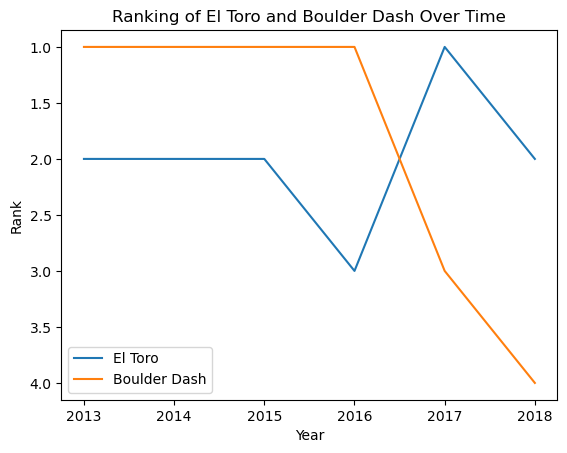

In [124]:
plot_two_coasters_ranking('El Toro', 'Six Flags Great Adventure', 'Boulder Dash', 
                          'Lake Compounce', wood_rankings)

In [125]:
def plot_top_n_rankings(n, rankings_df):
    top_n_rankings = rankings_df[rankings_df['Rank'] <= n]
    plt.figure(figsize=(10,6))
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        plt.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'],
                label = coaster)
        plt.gca().invert_yaxis()
        plt.xlabel('Year')
        plt.ylabel('Rank')
        plt.title(f'Top {n} Roller Coasters Over Time')
        plt.legend(loc='best')
    plt.show()

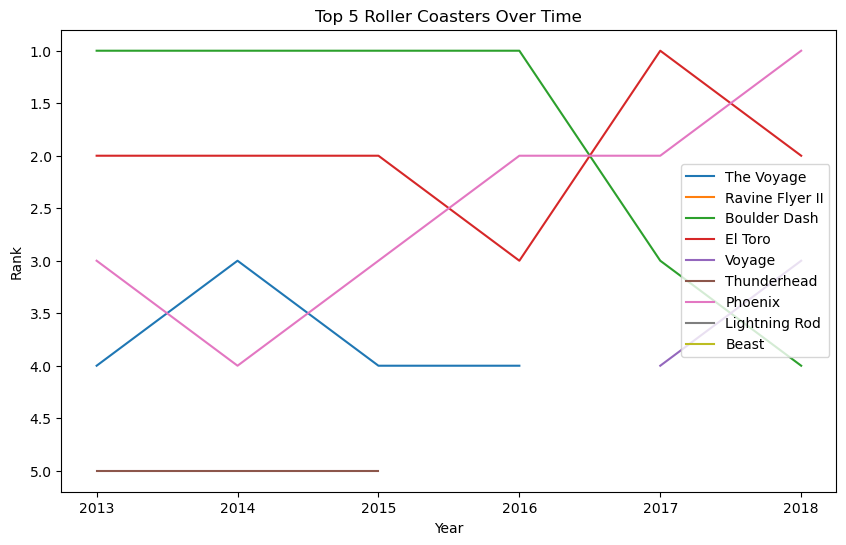

In [128]:
plot_top_n_rankings(5, wood_rankings)

In [135]:
coaster_df = pd.read_csv('roller_coaster.csv')

In [137]:
print(coaster_df.head())

            name material_type seating_type speed height  length  \
0       Goudurix         Steel     Sit Down    75     37   950.0   
1  Dream catcher         Steel    Suspended    45     25   600.0   
2     Alucinakis         Steel     Sit Down    30      8   250.0   
3       Anaconda        Wooden     Sit Down    85     35  1200.0   
4         Azteka         Steel     Sit Down    55     17   500.0   

   num_inversions     manufacturer            park            status  \
0             7.0           Vekoma    Parc Asterix  status.operating   
1             0.0           Vekoma   Bobbejaanland  status.operating   
2             0.0         Zamperla    Terra Mítica  status.operating   
3             0.0  William J. Cobb  Walygator Parc  status.operating   
4             0.0           Soquet          Le Pal  status.operating   

  Unnamed: 10 Unnamed: 11  
0         NaN         NaN  
1         NaN         NaN  
2         NaN         NaN  
3         NaN         NaN  
4         NaN     

In [161]:
def plot_histogram(df, column_name):
    data = df[column_name].dropna()
    plt.figure(figsize=(10,6))
    plt.hist(data, bins=20, edgecolor='black')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {column_name}')
    plt.show()

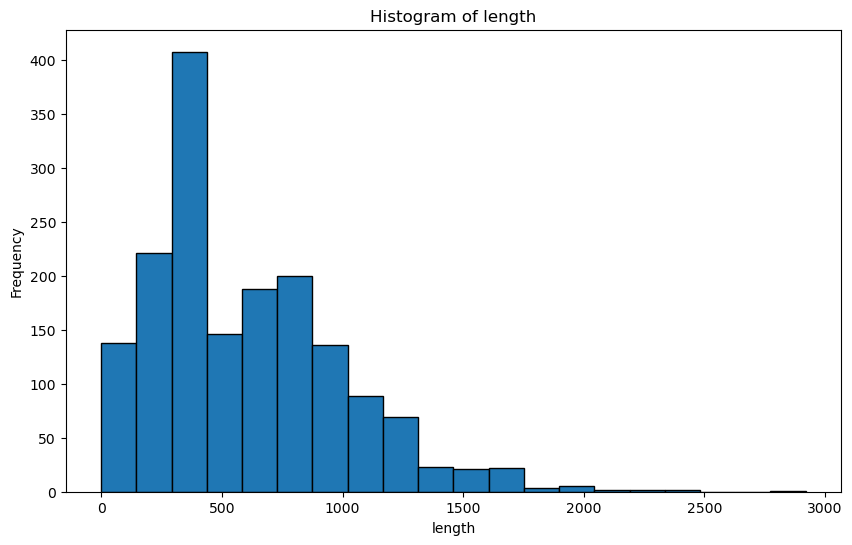

In [163]:
plot_histogram(coaster_df, 'length')

In [181]:
def plot_bar(df, park_name):
    park_coasters = df[df['park'] == park_name]
    park_coasters = park_coasters.sort_values('num_inversions', ascending=False)
    coaster_names = park_coasters['name']
    number_inversions = park_coasters['num_inversions']
    plt.figure(figsize=(10,6))
    plt.bar(coaster_names, number_inversions, color='skyblue')
    plt.xlabel('Roller Coaster')
    plt.ylabel('Number of Inversions')
    plt.title(f'Number of Inversions for Roller Coasters at {park_name}')
    plt.xticks(rotation=45, ha='right')
    plt.show()

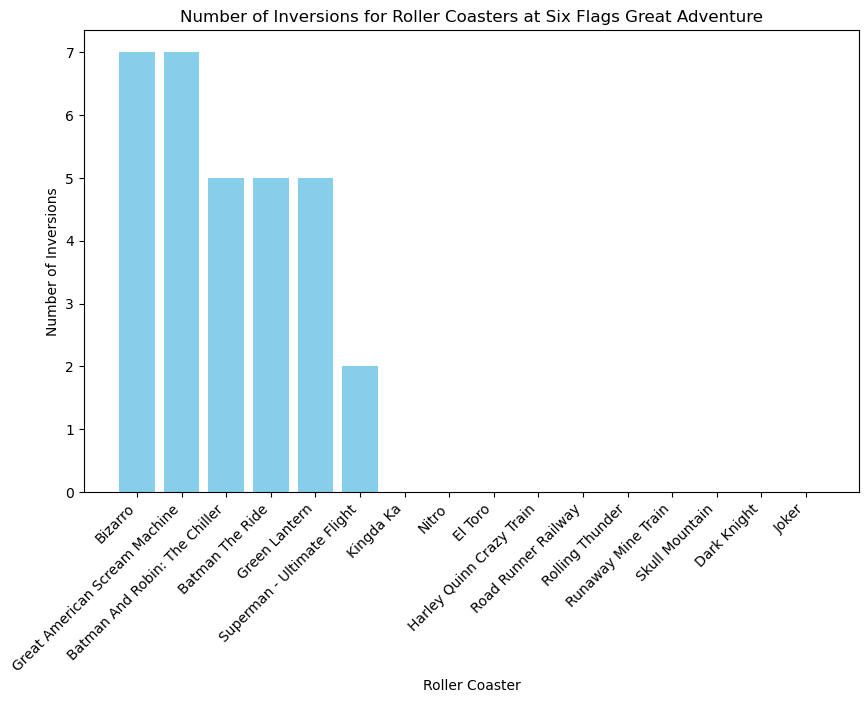

In [183]:
plot_bar(coaster_df, 'Six Flags Great Adventure')

In [233]:
def plot_pie(df):
    operating_coasters = df[df['status'] == 'status.operating'].shape[0]
    closed_coasters = df[df['status'] == 'status.closed.definitely'].shape[0]
    status_counts = [operating_coasters, closed_coasters]
    labels = ['Operating', 'Closed']
    plt.figure(figsize=(8,8))
    plt.pie(status_counts, labels=labels, autopct='%1.1f%%', startangle=90, colors=['red', 'green'])
    plt.title('Operating vs Closed Roller Coasters')
    plt.show()

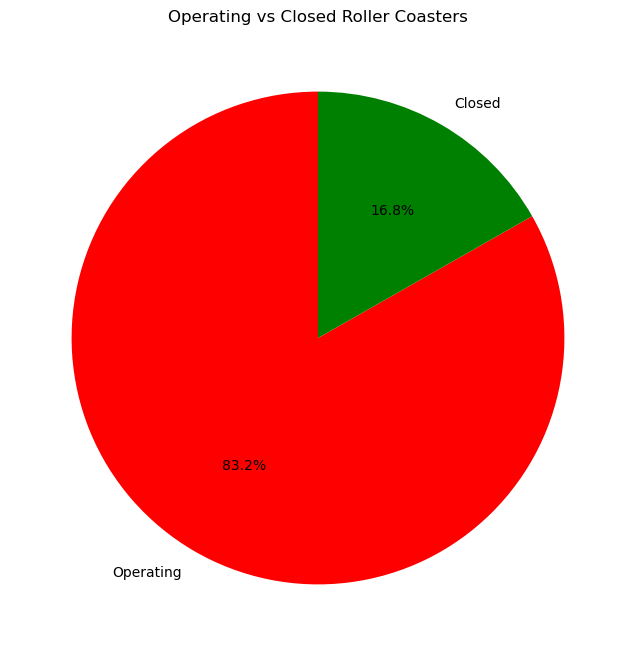

In [235]:
plot_pie(coaster_df)

In [245]:
def scatter_plot(df, column1, column2):
    data = df[[column1, column2]].dropna()
    data1 = data[column1]
    data2 = data[column2]
    plt.figure(figsize=(10,6))
    plt.scatter(data1, data2, alpha=0.7)
    plt.xlabel(column1)
    plt.ylabel(column2)
    plt.title(f'Scatter Plot of {column1} vs {column2}')
    plt.show()

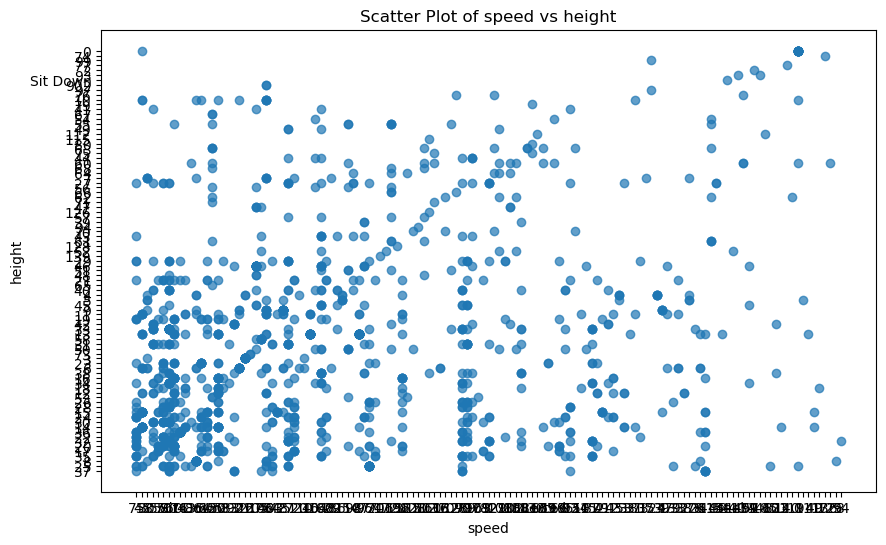

In [247]:
scatter_plot(coaster_df, 'speed', 'height')